### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-white')
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly import tools

from sklearn.feature_selection import mutual_info_classif

### Read dataset

 --- 

First we define the path to the dataset and column names. Then using Pandas library, we read the adult.csv file. To about extra space we used a sperator where we defind ``` sep = r'\s*,\s*' ```. Again we used a lambda function while reading the csv file to take only white and black race in the dataset. After read the dataset, we print the length of the dataset which is $ 30,940 $ and contain about $ 15 $ features.

In [4]:
data_path = 'E:/canada syntex/Github/fair_classifier_ml/data/adult.data'

# defining the column name
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
                    'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                    'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'target']
# load dataset      
df = (pd.read_csv(data_path, names=column_names, 
                    na_values="?", sep=r'\s*,\s*', engine='python')
                    .loc[lambda df: df['race'].isin(['White', 'Black'])])
                    

print("Length of the dataset: ",len(df))
print("The dataset shape: ",df.shape)

Length of the dataset:  30940
The dataset shape:  (30940, 15)


### Dataset related information

---

In this section, we will explore the dataset using pandas buitin functions. First, we see the first five column to get an overview of the dataset.

In [5]:
df.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education_num,13,13,9,7,13
marital_status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


**Columns information**

Next, we will get each column information of the dataset using builtin function called info(). This function will give us:
- Column id
- Column name
- Non-Null Count
- Column data type

From Dtype column, we find that we have $15$ columns where $6$ of them are integer data type and rest of them are string data type. In the non-null count, we observe that workclass, occupation, country have some null values. Lastly, we get total memory usage which is $ 3.8+ $ MB

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30940 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30940 non-null  int64 
 1   workclass       29217 non-null  object
 2   fnlwgt          30940 non-null  int64 
 3   education       30940 non-null  object
 4   education_num   30940 non-null  int64 
 5   marital_status  30940 non-null  object
 6   occupation      29210 non-null  object
 7   relationship    30940 non-null  object
 8   race            30940 non-null  object
 9   sex             30940 non-null  object
 10  capital_gain    30940 non-null  int64 
 11  capital_loss    30940 non-null  int64 
 12  hours_per_week  30940 non-null  int64 
 13  country         30458 non-null  object
 14  target          30940 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


**Summary statistics**

Now we will get the full details of our dataset using builtin function called ``` describe() ```. This function gives us a summary statistics  of each column in the dataset. We pass a parameter ``` include='all' ``` to see all the column's information. Without passing the parameter, this function will give us a summary statistics containing only the integer value type columns. For numerical values it's include:
 - Total number of value
 - Average value
 - Standard deviation
 - Minimum value
 - Maximum value
 
For string value it's include:
 - Number of unique value
 - Highest number of occurrence
 - Frequency

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,30940.0,NaN,NaN,NaN,38.668714,13.685619,17.0,28.0,37.0,48.0,90.0
workclass,29217,8,Private,21580,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,30940.0,NaN,NaN,NaN,191409.048352,106082.504618,18827.0,119170.0,180281.5,238404.5,1484705.0
education,30940,16,HS-grad,10078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,30940.0,NaN,NaN,NaN,10.069716,2.551595,1.0,9.0,10.0,12.0,16.0
marital_status,30940,7,Married-civ-spouse,14247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,29210,14,Craft-repair,3938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,30940,6,Husband,12611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,30940,2,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,30940,2,Male,20743,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check for missing value**

From upper cell we see that there were some missing values in the dataset. We define a function called ``` print_missing_values() ``` to get all the missing value or null value and plot it in a bar diagram. We considered both null value and negative values. We can see that only three columns contains null values where
- occupation = 1730
- workclass = 1723
- country = 482

After find out the number of missing values we remove all missing value using builtin function called ``` dropna() ```.

In [8]:
def print_missing_values(data):
    data_null = pd.DataFrame(len(data) - data.notnull().sum(), columns = ['Count'])
    data_null = data_null[data_null['Count'] > 0].sort_values(by='Count', ascending=False)
    data_null = data_null   #/len(data) * 100

    trace = go.Bar(x=data_null.index, y=data_null['Count'], marker=dict(color='#c0392b'),
              name = 'At least one missing value', opacity=0.9)
    layout = go.Layout(barmode='group', title='Column with missing values in the dataset', showlegend=True,
                   legend=dict(orientation="h"), yaxis=dict(title='Number of missing value'))
    fig = go.Figure([trace], layout=layout)
    py.iplot(fig)

print('Number total of rows : '+str(df.shape[0]))
print_missing_values(df)
df = df.dropna()    # remove missing value

Number total of rows : 30940


**Check unique values in the dataset**

The upper cells did not give us unique value for all the columns in the dataset. So, we used another builtin function called  ```nunique()``` to gives us unique value for all the features. Here we can see that **fnlwgt** got the highest unique values. We can also see that target columns has only two unique values. That means our dataset require binary classification.

In [9]:
df.nunique()

age                  72
workclass             7
fnlwgt            19388
education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  2
sex                   2
capital_gain        118
capital_loss         87
hours_per_week       94
country              39
target                2
dtype: int64

**Bar chart plot**

Now we will see the histogram of the columns that has numerical values. It will give us an idea about the data distribution.

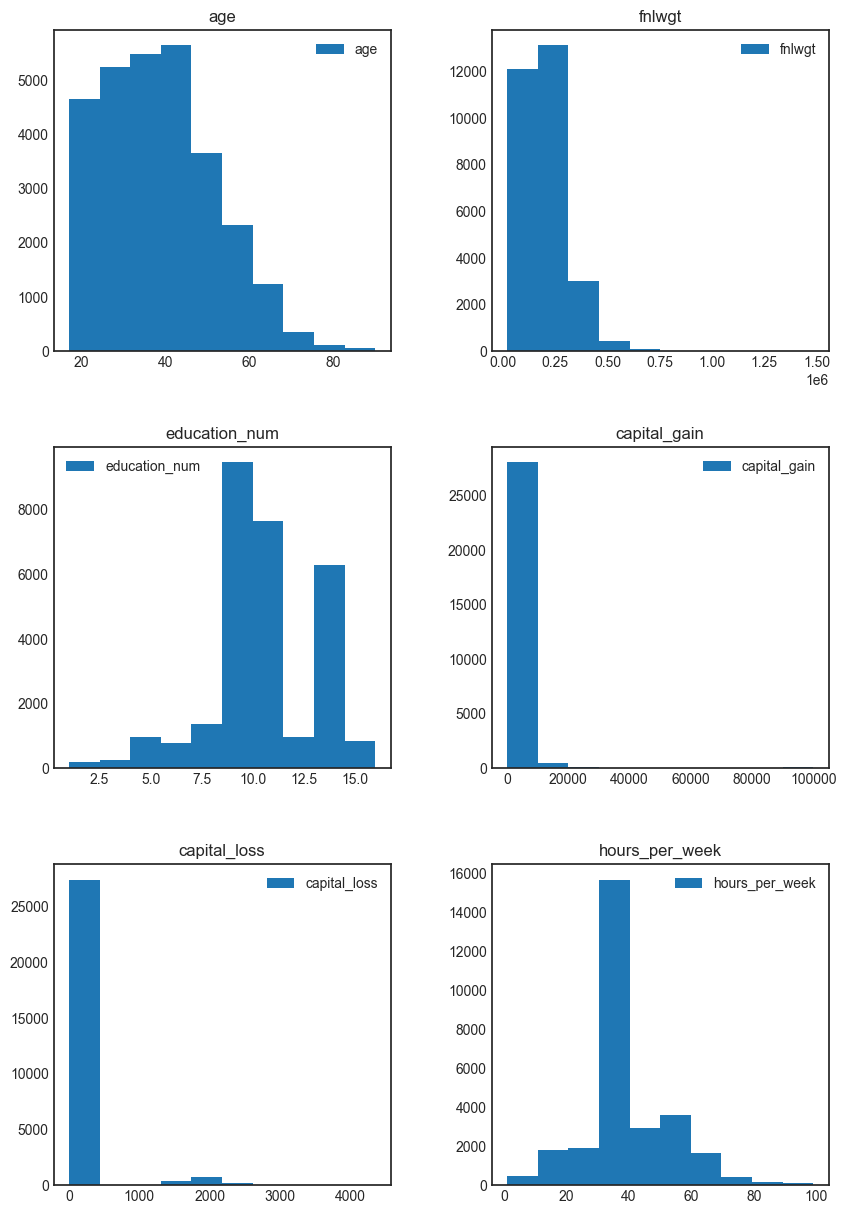

In [10]:
hist = df.hist(bins=10, figsize=(10, 15), grid=False, legend=True)

### Unbalanced dataset

---

We will start by seeing if our dataset is unbalanced. Specifically, we mean unbalanced in terms of the sensitive attributes. Looking at below figure, we have the breakdown of the population by race and sex. You can see that we do have an unbalanced dataset. The first chart shows that 86% of our population is white. Similarly, 68% of the population is male.

In [11]:
def target_distribution(y_var, data):
    val = data[y_var]

    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    cnt = val.value_counts().sort_values(ascending=True)
    labels = cnt.index.values

    sizes = cnt.values
    colors = sns.color_palette("PuBu", len(labels))

    #------------COUNT-----------------------
    ax1.barh(cnt.index.values, cnt.values, color=colors)
    ax1.set_title('Count plot of '+y_var)

    #------------PERCENTAGE-------------------
    ax2.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%', shadow=True, startangle=130)
    ax2.axis('equal')
    ax2.set_title('Distribution of '+y_var)
    plt.show()

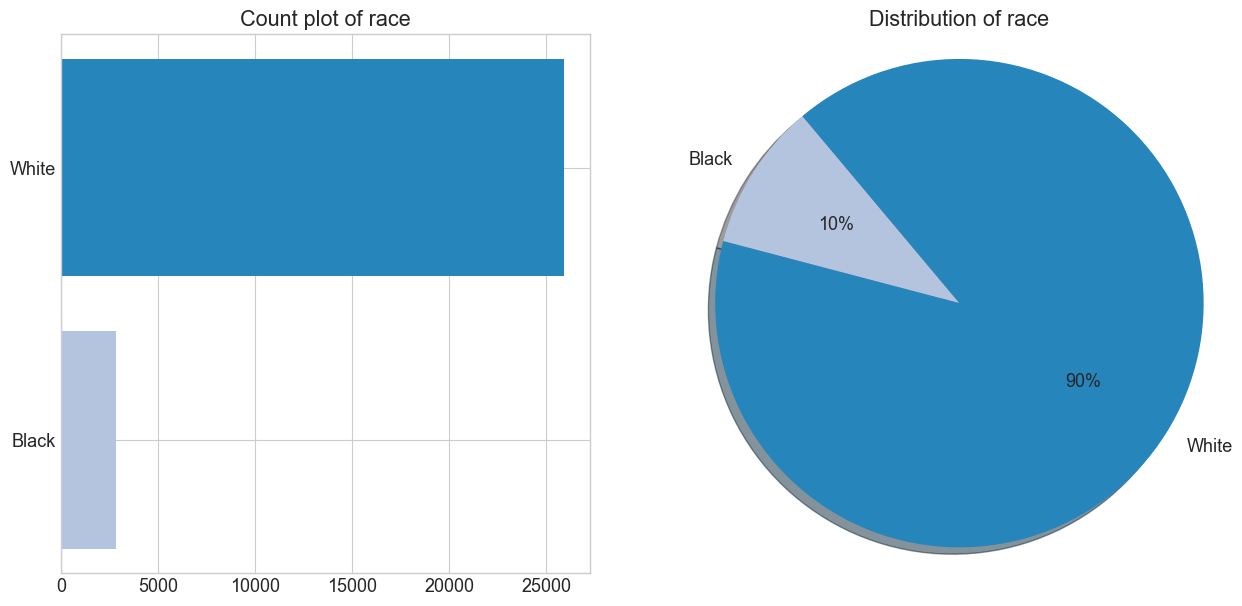

In [12]:
var = 'race'
target_distribution(y_var=var, data=df)

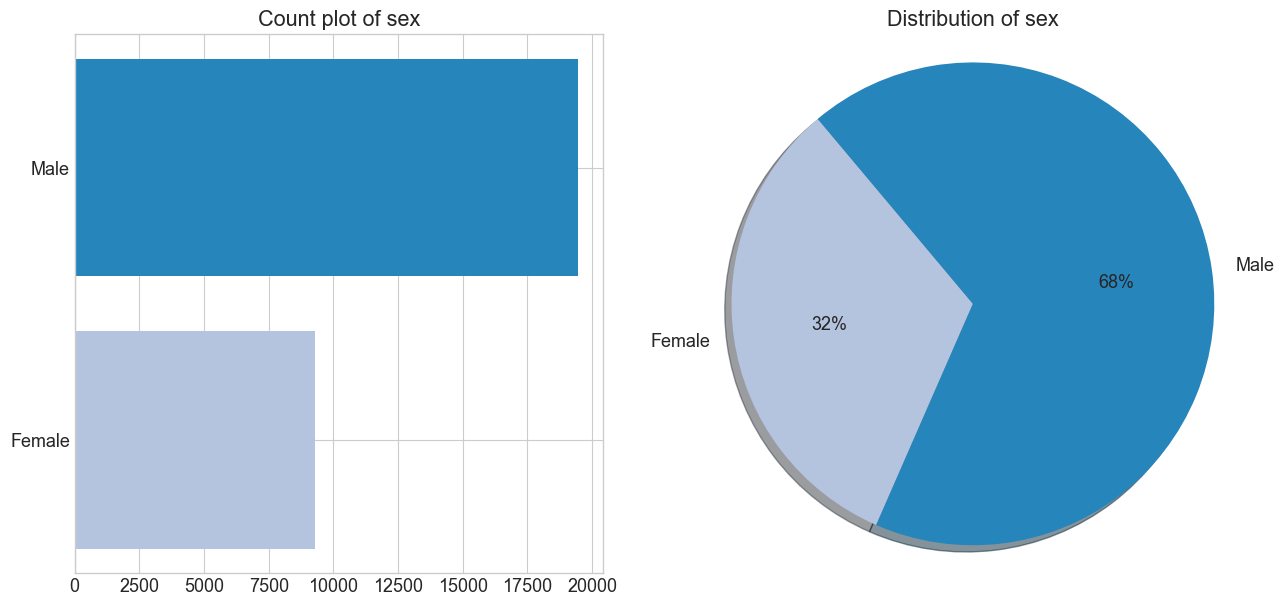

In [13]:
var = 'sex'
target_distribution(y_var=var, data=df)

### Defining protected features

---

Now, we will need to define the protected features. We do this by creating binary variables using the sensitive attributes. We define the variable so that 1 represents a privileged group and 0 represents an unprivileged group. Typically, the unprivileged group will have faced historical injustice in the past. In other words, it is the group that will most likely face unfair decisions from a biased model.

In [14]:
df_fair = df[['race','sex']]

#Define protected variables 
df_fair['priv_race'] = [1 if r=='White' else 0 for r in df_fair['race']]
df_fair['priv_sex'] = [1 if s=='Male' else 0 for s in df_fair['sex']]

#Define target variable 
df_fair['target'] =  [1 if y == '>50K'else 0 for y in df['target']]

df_fair.head(10)

,race,sex,priv_race,priv_sex,target
0,White,Male,1,1,0
1,White,Male,1,1,0
2,White,Male,1,1,0
3,Black,Male,0,1,0
4,Black,Female,0,0,0
5,White,Female,1,0,0
6,Black,Female,0,0,0
7,White,Male,1,1,1
8,White,Female,1,0,1
9,White,Male,1,1,1


### Prevelance

--- 

For a target variable, prevalence is the proportion of the positive cases to overall cases. Where a positive case is when the target variable has a value of 1. Our dataset has an overall prevalence of 24.8%. That is roughly 1/4 of the people in our dataset earn above $50K. We can also use prevalence as a fairness metric.

We do this by calculating prevalence for our different privileged (1) and unprivileged (0) groups. We can see these values in Table 1 below. Notice that the prevalence is much higher for the privileged groups. If fact, a male you are nearly 3 times as likely to earn above $50K than a female.

In [15]:
# Calculate prevelance
prev = df_fair['target'].mean()
prev_race = df_fair.groupby('priv_race')['target'].mean()
prev_sex = df_fair.groupby('priv_sex')['target'].mean()
prev_comb = df_fair.groupby(['priv_race','priv_sex'])['target'].mean()

prev_race = prev_race*100
prev_sex = prev_sex*100
prev_comb = prev_comb*100

print("________________________________")
print("Table: 1")
print("\t1 \t   0")
print("Race  {:.2f}% \t {:.2f}%".format(prev_race[1], prev_race[0]))
print("Sex   {:.2f}% \t {:.2f}%".format(prev_sex[1], prev_sex[0]))
print("________________________________")

________________________________
Table: 1
	1 	   0
Race  26.37% 	 12.99%
Sex   31.60% 	 11.36%
________________________________


We can go further by calculating the prevalence at the intersection of the protected features. We can see these values in Table 2. The top left corner gives the prevalence if you are in both privileged groups. Similarly, the bottom right gives the prevalence if you are in neither privileged group. This tells us that white males are over 4 times as likely to earn above $50K than non-white females.

- race
    - 1 = white
    - 0 = black
- sex
    - 1 = male
    - 0 = female


In [16]:
print("________________________________")
print("Table: 2")

print(prev_comb)

print("________________________________")

________________________________
Table: 2
priv_race  priv_sex
0          0            6.075768
           1           19.816643
1          0           12.298923
           1           32.531323
Name: target, dtype: float64
________________________________


### Proxy Variable

---

Another way we can analyse potential sources of bias is by finding proxy variables. These are model features that are highly correlated or associated with our protected features. A model that uses a proxy variable can effectively be using a protected feature to make decisions. We can find proxy variables in a similar way to how you find important features during feature selection. That is we use some measure of association between the features and target variable. Except now, instead of the target variable, we use the protected features. We will look at two measures of association
- mutual information 
- feature importance.

Before that, we need to do some feature engineering. We start by creating a target variable just as before. We then create 6 model features. To start, we leave age, education-num and hours-per-week as is. We create binary features from marital-status and native-country. Lastly, we create the occupation feature by grouping the original occupations into 5 groups. In the next section, we will use these same features to build our model.

In [17]:
#Target variable 
y = [1 if y == '>50K' else 0 for y in df['target']]

#Model features
X = df[['age','education_num','hours_per_week']]
X['marital_status'] = [1 if x=='Married-civ-spouse' else 0 for x in df['marital_status']] 
X['country'] = [1 if x=='United-States' else 0 for x in df['country']] 

occ_groups = {
    'Priv-house-serv':0,'Other-service':0,'Handlers-cleaners':0,
    'Farming-fishing':1,'Machine-op-inspct':1,'Adm-clerical':1,
    'Transport-moving':2,'Craft-repair':2,'Sales':2,
    'Armed-Forces':3,'Tech-support':3,'Protective-serv':3,
    'Prof-specialty':4,'Exec-managerial':4}

X['occupation'] = [occ_groups[x] for x in df['occupation']]

X.head()

,age,education_num,hours_per_week,marital_status,country,occupation
0,39,13,40,0,1,1
1,50,13,13,1,1,4
2,38,9,40,0,1,0
3,53,7,40,1,1,0
4,28,13,40,1,0,4


### Mutual information 

---

Mutual information is a measure of non-linear association between two variables. It indicates how much the uncertainty around one variable is reduced by observing another. In the figure, we can see the mutual information values between each of the 6 features and protected features. Notice the high value between marital-status and sex. This suggests a possible relationship between these variables. In other words, marital-status could be a proxy variable for sex. Another approach we can take is to build a model using the protected features. That is we try to predict the protected feature using the 6 model features. We can then use feature importance scores from this model as our measure of association. We can see the result of this process in the figure.

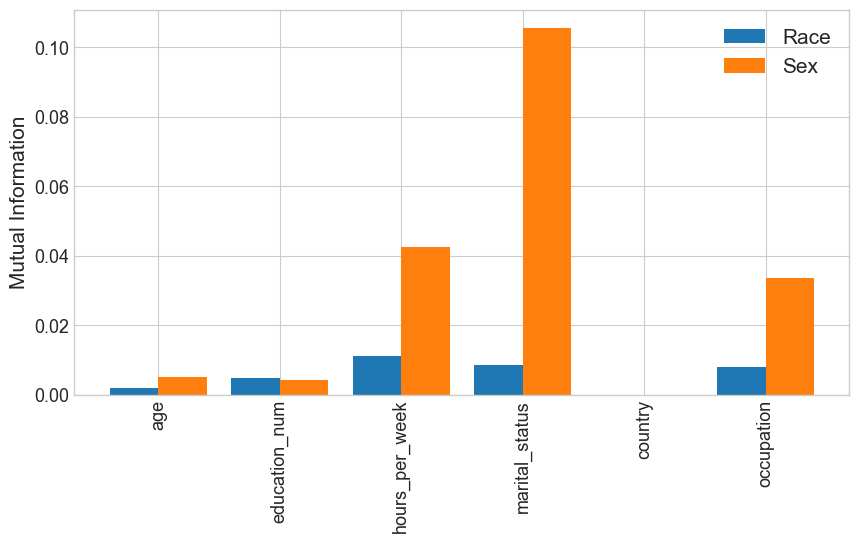

In [46]:
#Calcualte mutual information
mut_race = mutual_info_classif(X,df_fair['priv_race'],discrete_features=[1,3,4,5])
mut_sex = mutual_info_classif(X,df_fair['priv_sex'],discrete_features=[1,3,4,5])


#Plot mutual information
plt.figure(figsize=(10, 5))

labels = ['age', 'education_num', 'hours_per_week', 'marital_status',
       'country', 'occupation']
x = np.arange(6) # lenth of the labels
width = 0.4
plt.bar(x-width/2,height= mut_race,width=width,label='Race')
plt.bar(x+width/2,height= mut_sex,width=width,label='Sex')
plt.legend(fontsize=15)

plt.ylabel('Mutual Information',size=15)
plt.xticks(ticks=x,labels=labels, rotation=90)

plt.show()

# plt.savefig(output_path+"Mutual_information.png", dpi=1000)

### Sensitive features vs other features

---

In this section, we will see the data distribution of each columns based on two sensitive features race and sex. First we calculate the frequency of the sensitive features. Based on the frequency we get $ 62.7409\% $ of male white in our dataset. So, in our dataset, the perpetrator is  white males.

In [19]:
df['Frequency'] = 1
freq_target = df[['sex', 'race', 'Frequency']]
del df['Frequency']
freq_target = freq_target.groupby(by=['sex', 'race']).count() / len(df)
print(freq_target.sort_values(by='Frequency', ascending=False))

              Frequency
sex    race            
Male   White   0.627409
Female White   0.274609
Male   Black   0.049322
Female Black   0.048661


In [29]:
def plot_histo(data, col, Y_columns, orientation):
    df = data.copy()
    fig, axs = plt.subplots(1,2,figsize=(20,6))
    
    for i in range(0,2):
        cnt = []; y_col = Y_columns[i]
        Y_values = df[y_col].dropna().drop_duplicates().values
        for val in Y_values:
            cnt += [df[df[y_col] == val][col].values]
        bins = df[col].nunique()

        axs[i].hist(cnt, bins=bins, stacked=True, orientation = orientation) #"horizontal"
        axs[i].legend(Y_values,loc='upper right')
        axs[i].set_title("Histogram of the "+col+" column by "+y_col)

    plt.show()

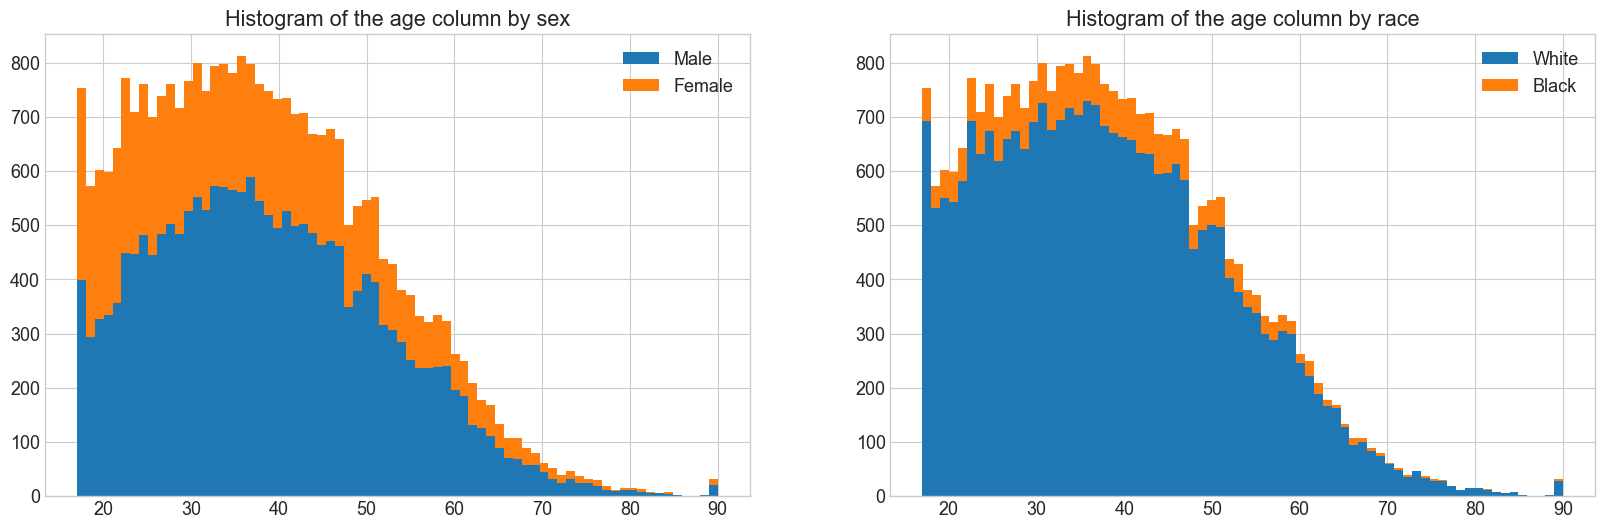

In [31]:
Y_columns = ['sex', 'race']
plot_histo(df, col='age',Y_columns=Y_columns, orientation = "vertical")

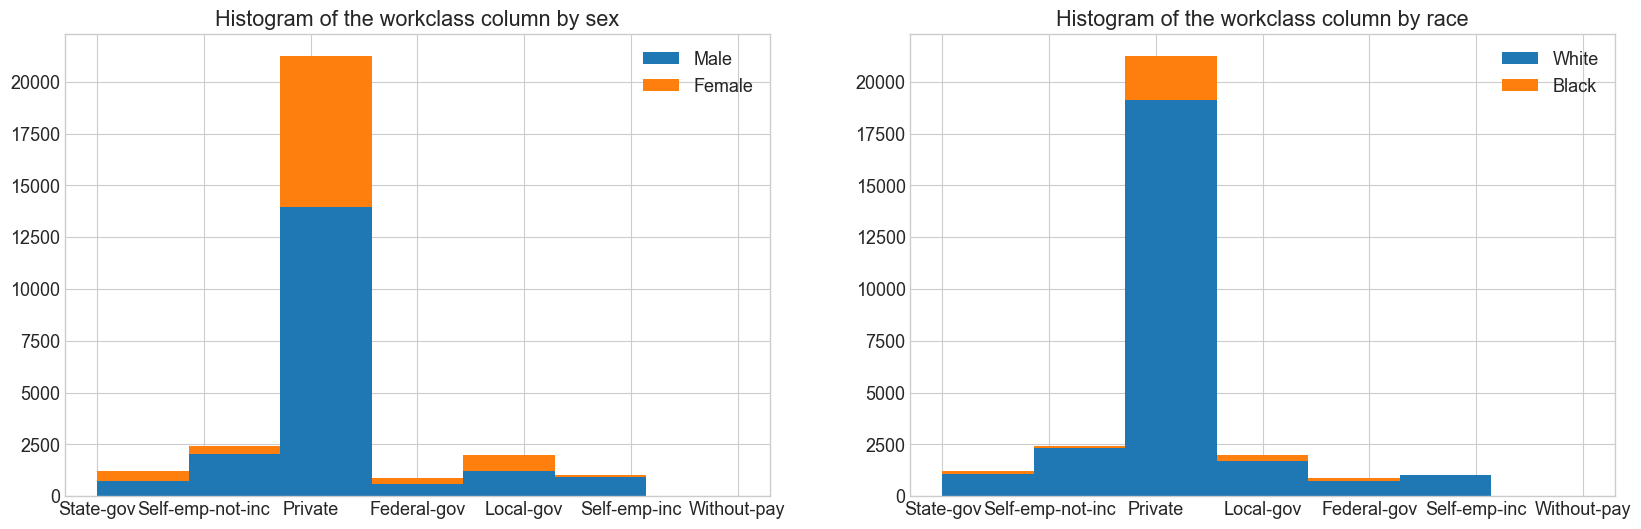

In [32]:
plot_histo(df, col='workclass',Y_columns=Y_columns, orientation = "vertical")

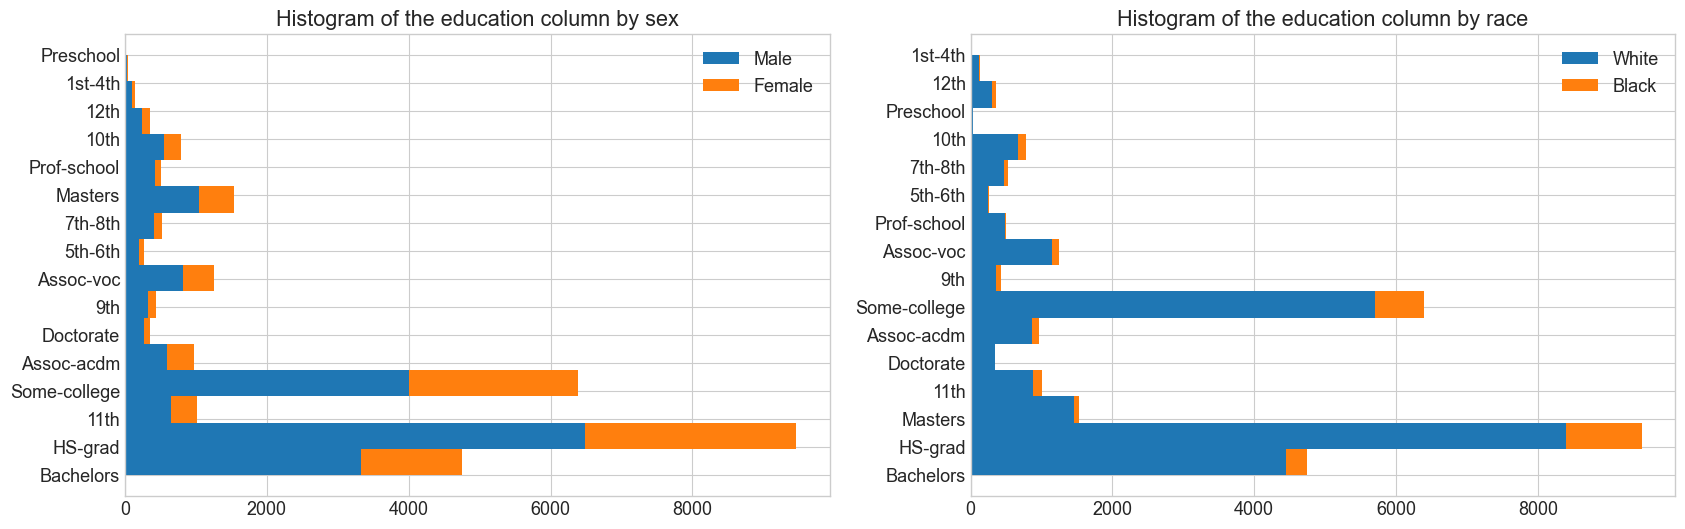

In [36]:
plot_histo(df, col='education',Y_columns=Y_columns, orientation = "horizontal")

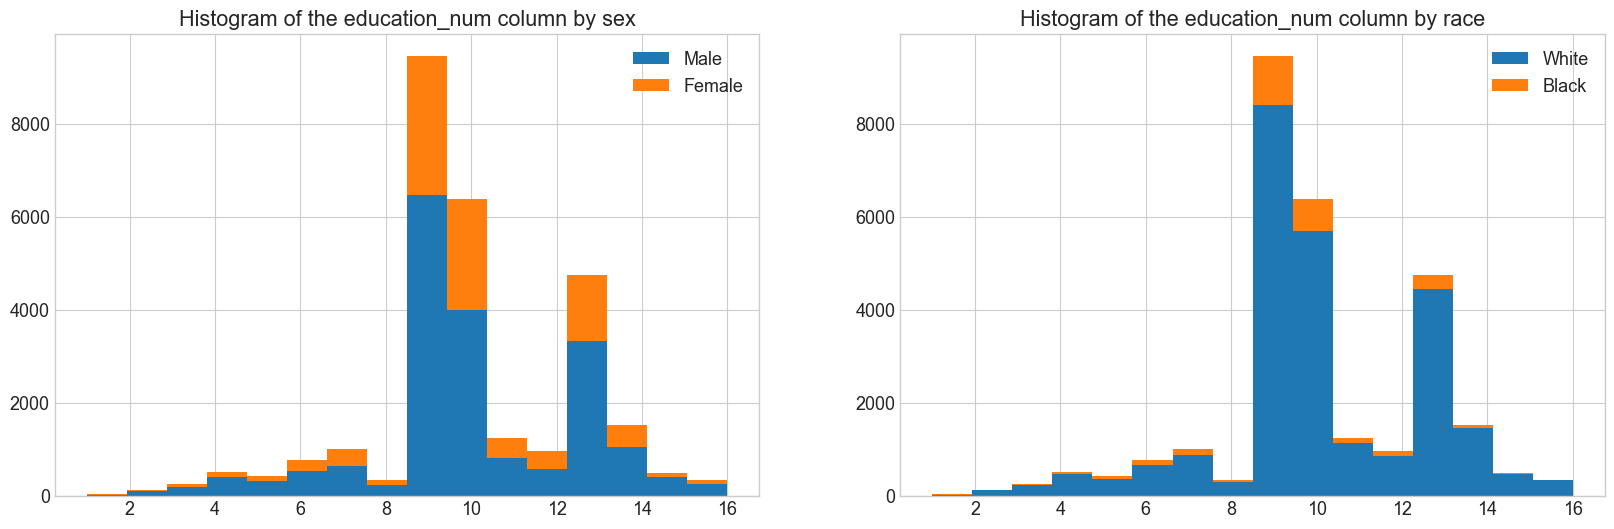

In [34]:
plot_histo(df, col='education_num',Y_columns=Y_columns, orientation = "vertical")

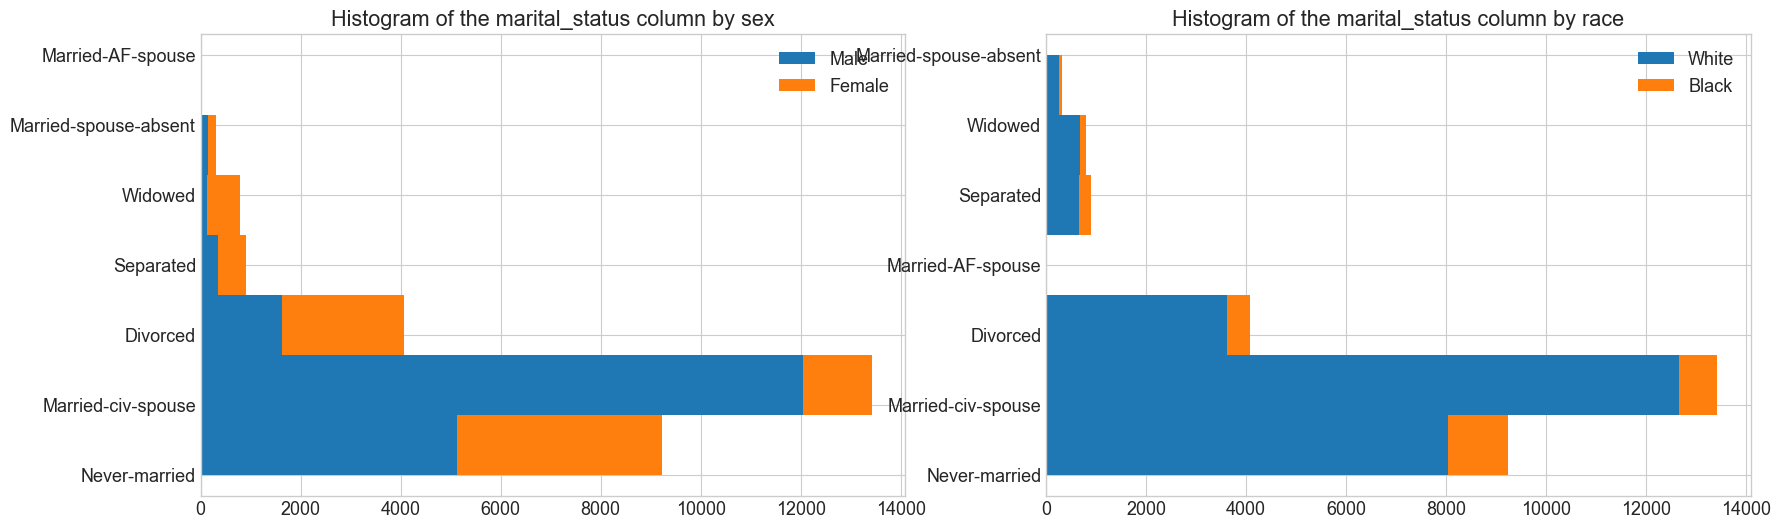

In [37]:
plot_histo(df, col='marital_status',Y_columns=Y_columns, orientation = "horizontal")

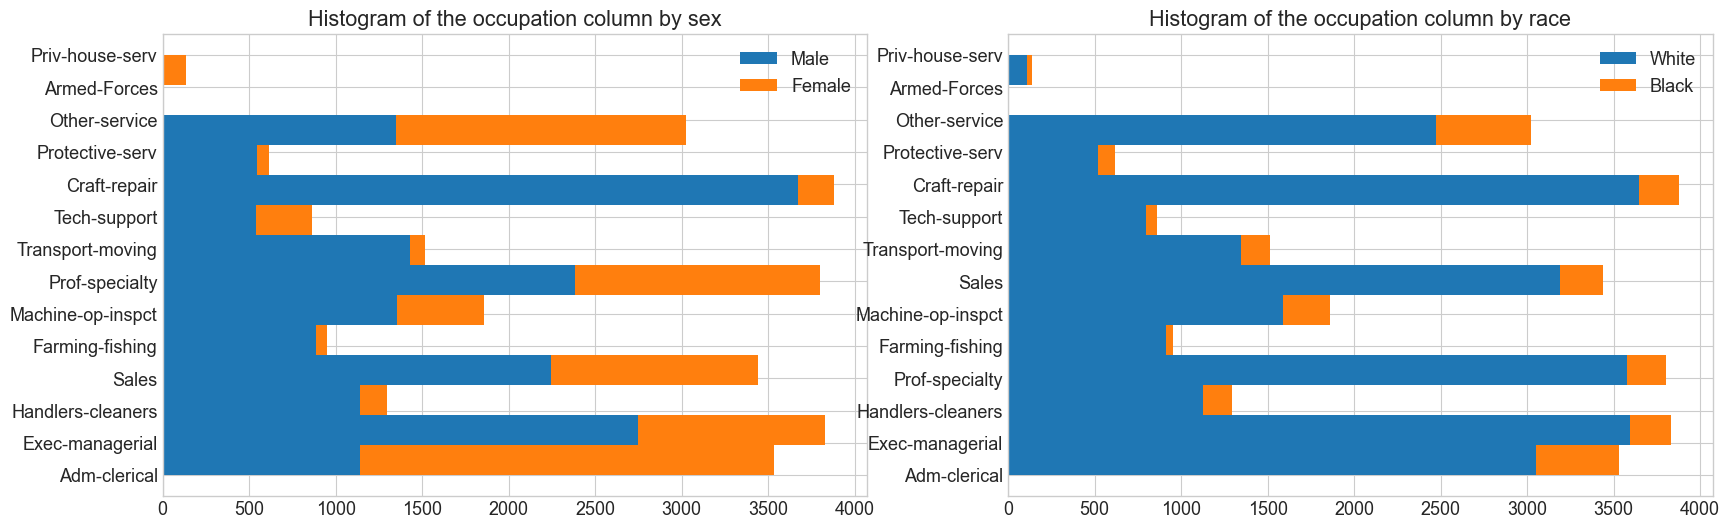

In [39]:
plot_histo(df, col='occupation',Y_columns=Y_columns, orientation = "horizontal")

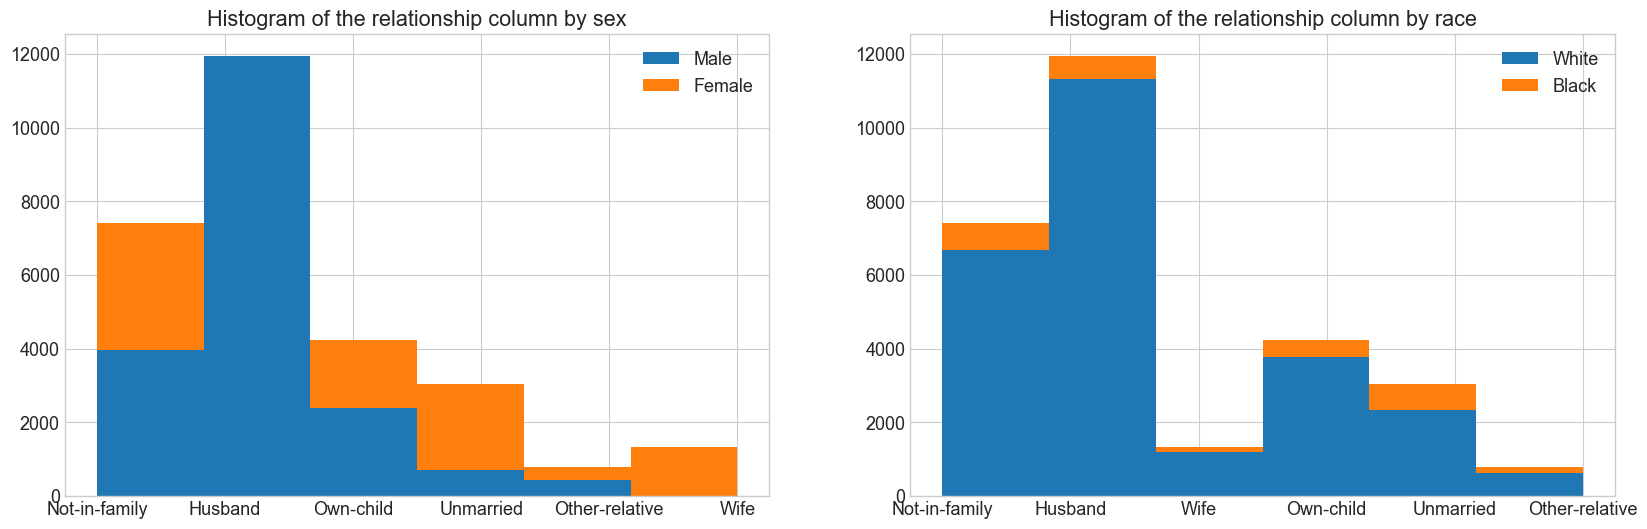

In [40]:
plot_histo(df, col='relationship',Y_columns=Y_columns, orientation = "vertical")

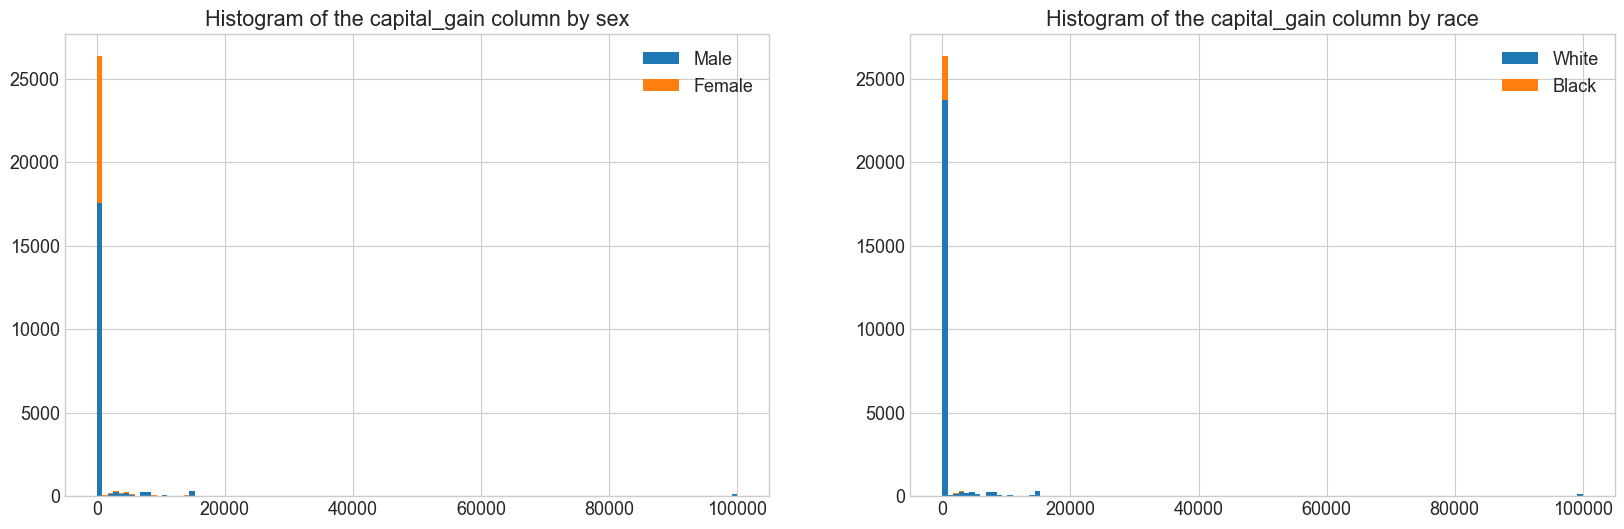

In [41]:
plot_histo(df, col='capital_gain',Y_columns=Y_columns, orientation = "vertical")

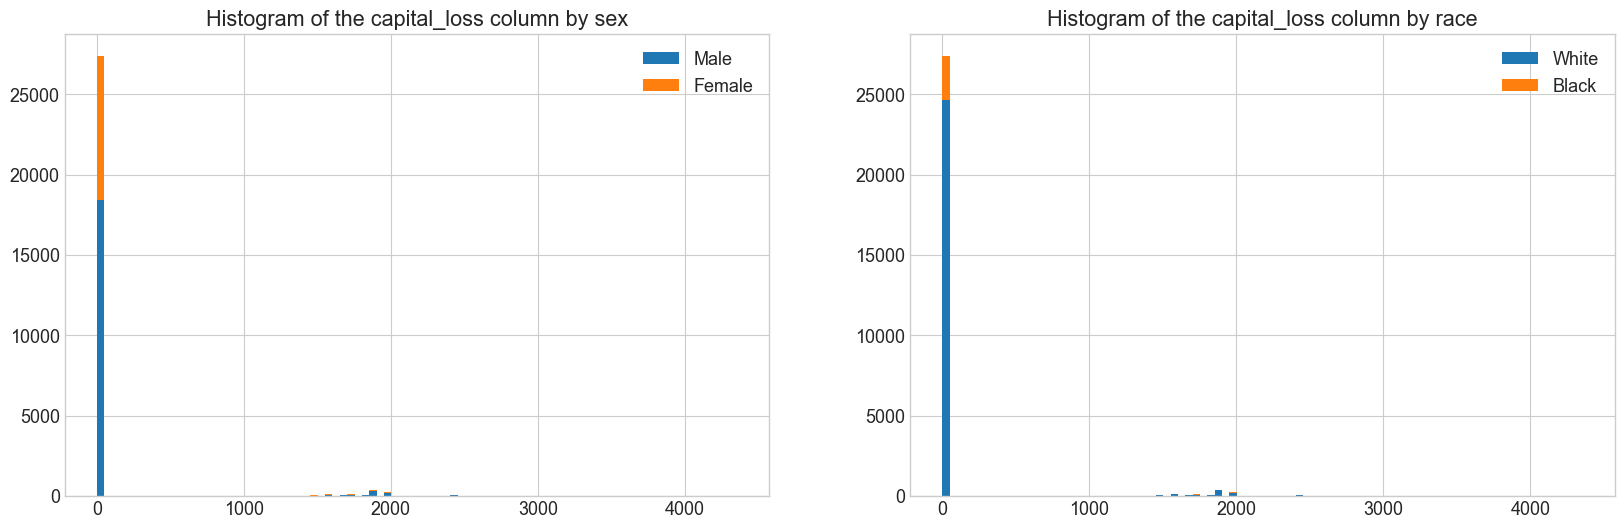

In [42]:
plot_histo(df, col='capital_loss',Y_columns=Y_columns, orientation = "vertical")

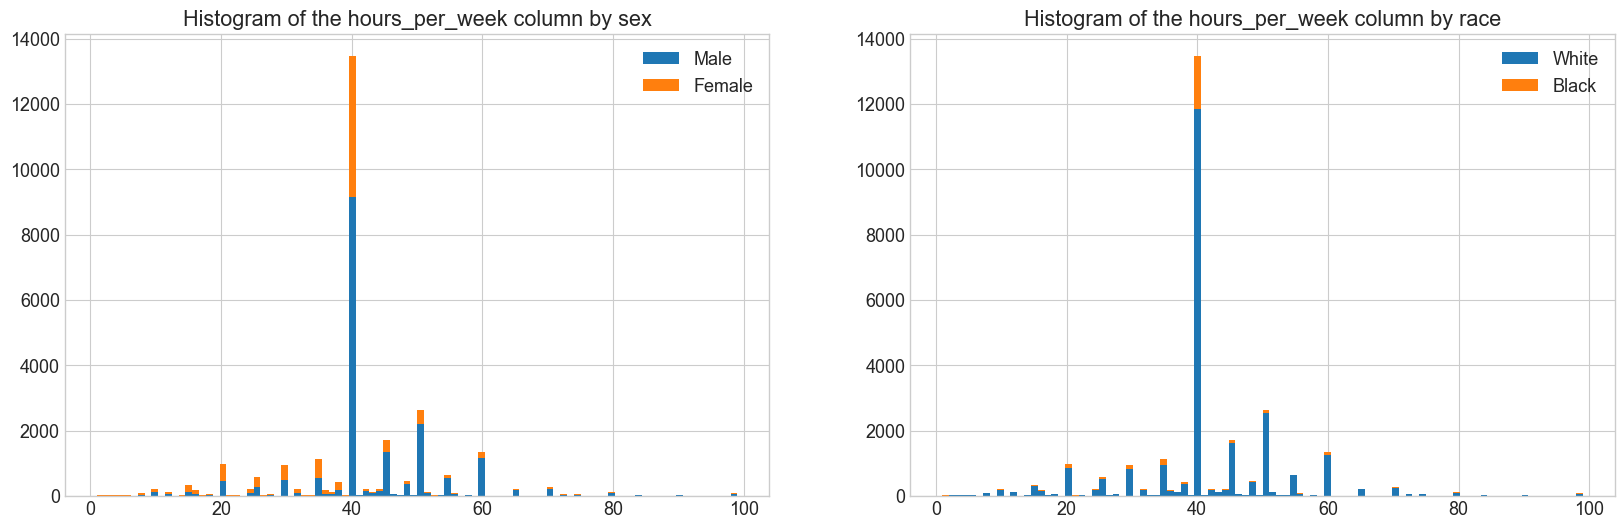

In [43]:
plot_histo(df, col='hours_per_week',Y_columns=Y_columns, orientation = "vertical")

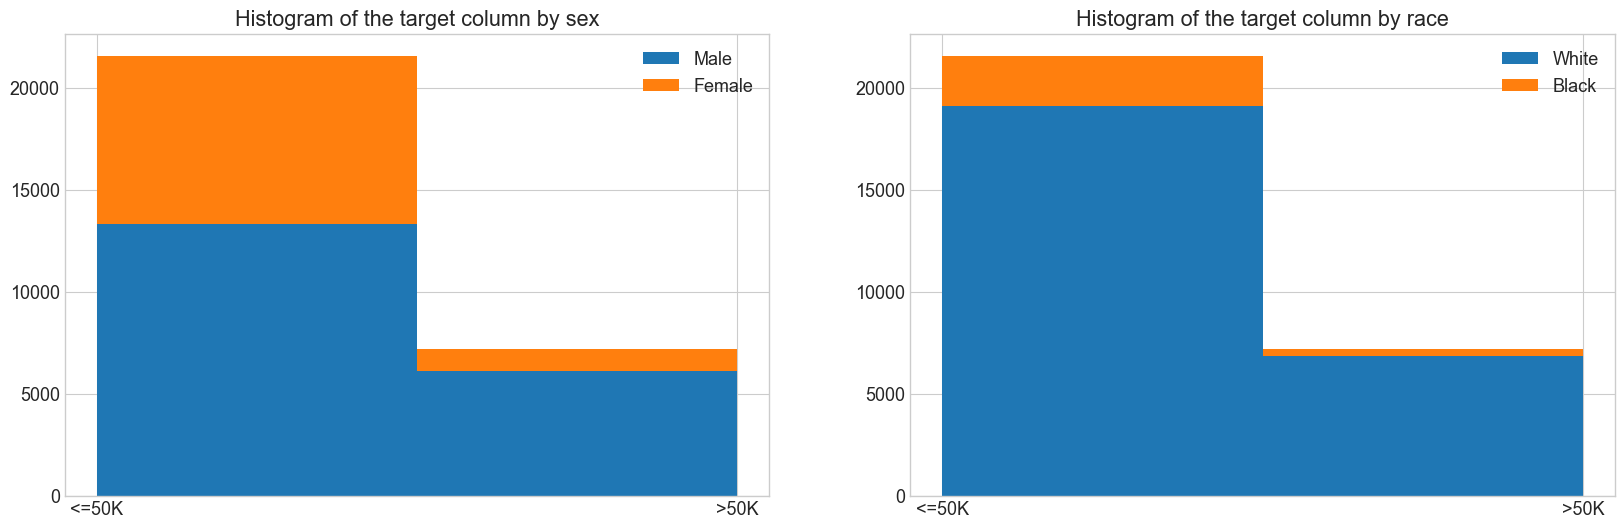

In [45]:
plot_histo(df, col='target',Y_columns=Y_columns, orientation = "vertical")